## Introduction

### Seoul Bike Sharing Demand Prediction

This project explores the hourly rental patterns of the Seoul Bike Sharing system and builds predictive models to forecast bike demand based on various features such as weather, seasonality, and time factors. The aim is to help optimize bike availability, reduce idle inventory, and improve commuter satisfaction.

### About Dataset 
The Seoul Bike Rental dataset contains information on bike rentals in Seoul, South Korea. It captures hourly rental data along with environmental and seasonal information such as:

* Date and Hour: Specifies when the rentals occurred.
* Bike Count: The target variable indicating the number of bikes rented.
* Weather Conditions: Includes temperature, humidity, wind speed, and rainfall.
* Seasonal Information: Highlights the time of year (spring, summer, autumn, winter).
* Holidays: Identifies if the day was a holiday or not.
* Other Variables: May include day of the week, solar radiation, and more.

### Problem Statement
The Seoul Bike Rental system aims to provide an efficient and environmentally friendly mode of transportation. However, ensuring the availability of rental bikes at the right time and location is a challenge. The goal is to analyze the dataset to understand the factors influencing bike rental demand and build a machine learning model to predict hourly bike demand. This will help optimize bike distribution, reduce waiting times, and improve user satisfaction.

### EDA 
1. Data Cleaning - handle missing values, outliers and inconsistencies
2. Univariate Analysis - analyze individual features like temprature, humidity etc.
3. Bivariate Analysis - explore fetaures between temprature & bike demand
4. Visualization

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings 
warnings.filterwarnings('ignore')

### 🔍 Initial Exploration

- View top records using `df.head()`
- Check dataset shape: number of rows and columns
- Get info about data types, non-null values using `df.info()`
- Understand distributions using `df.describe()`

In [7]:
df = pd.read_csv(r"C:\Users\Jahnavi\Downloads\SeoulBikeData.csv",encoding='ISO-8859-1')
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [9]:
df.shape

(8760, 14)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [13]:
df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


### 🧹 Data Cleaning

### ➤ Check for Missing Values
We check for and handle any null or missing values.

### ➤ Handle Outliers
We identify and address outliers using visualizations like boxplots. Outliers in weather-related variables (like rainfall, snowfall) may affect model performance.

#### Checking Null Values

In [15]:
df.isnull().sum()  ## can also use df.isna(), this also shows null values

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

#### Checking Outliers

In [17]:
num_df = df.select_dtypes(include='number')
num_df

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
8755,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0
8756,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0
8757,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0
8758,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0


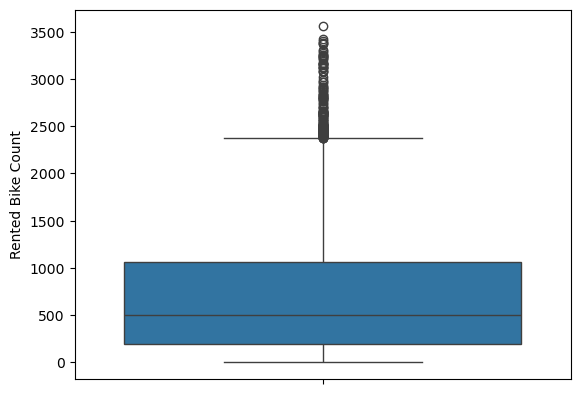

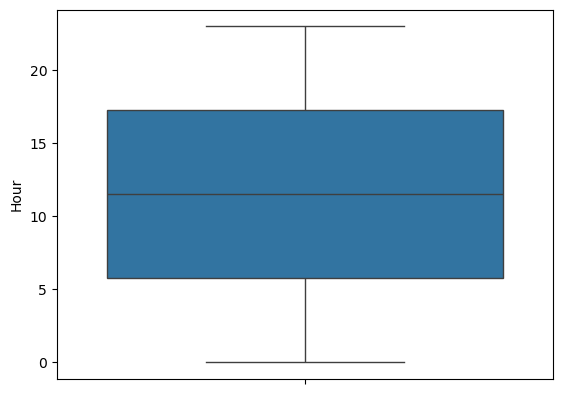

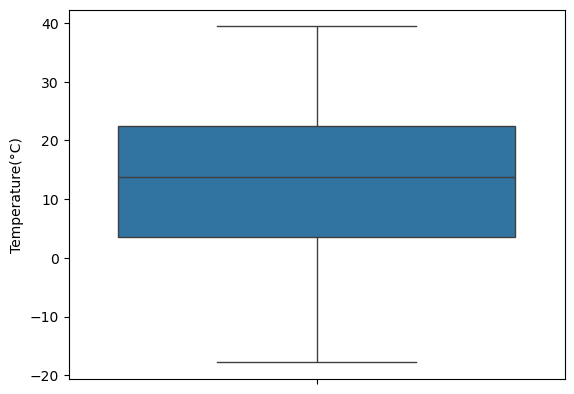

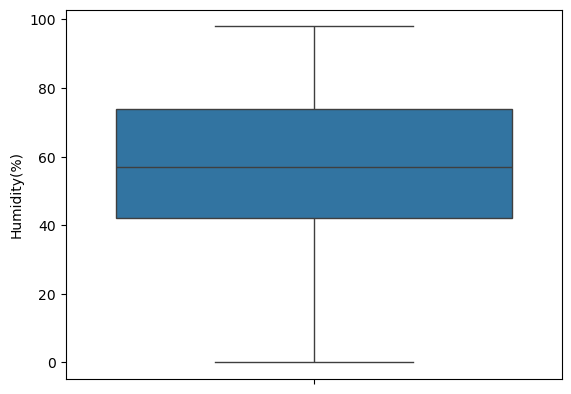

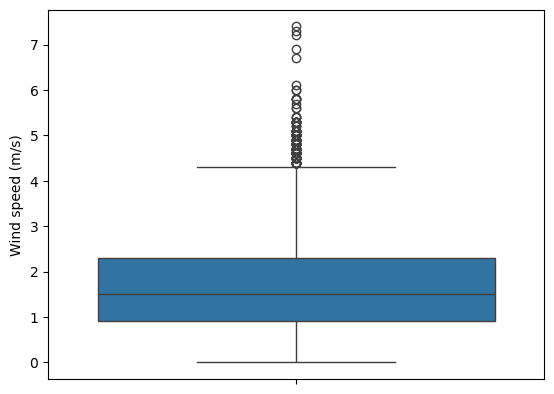

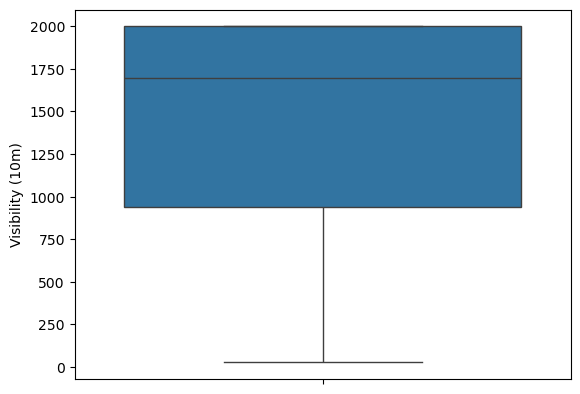

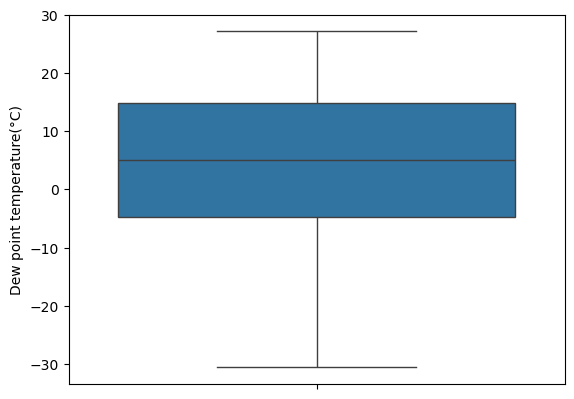

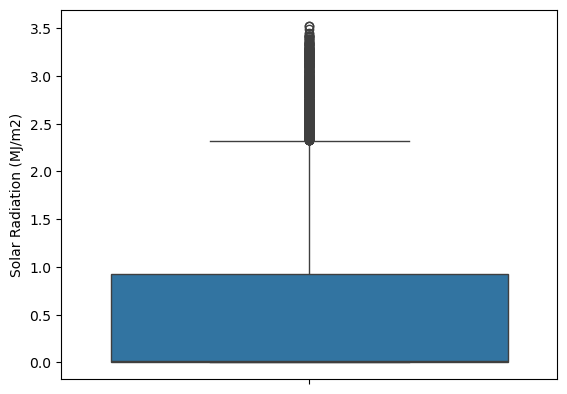

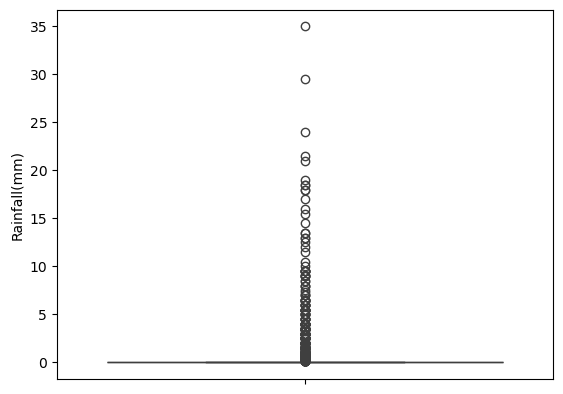

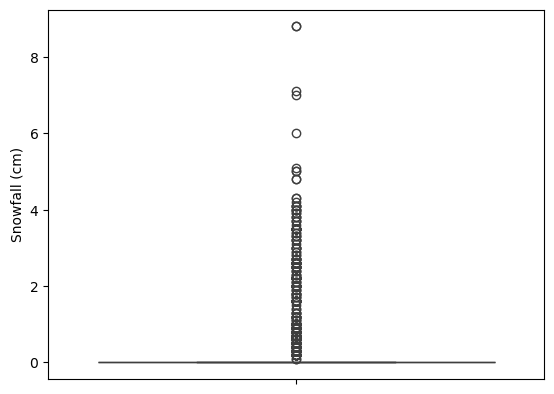

In [55]:
for col in num_df.columns:
    sns.boxplot(num_df[col])
    plt.show()

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(1, 0, 'Rented Bike Count'),
  Text(2, 0, 'Hour'),
  Text(3, 0, 'Temperature(°C)'),
  Text(4, 0, 'Humidity(%)'),
  Text(5, 0, 'Wind speed (m/s)'),
  Text(6, 0, 'Visibility (10m)'),
  Text(7, 0, 'Dew point temperature(°C)'),
  Text(8, 0, 'Solar Radiation (MJ/m2)'),
  Text(9, 0, 'Rainfall(mm)'),
  Text(10, 0, 'Snowfall (cm)')])

<Figure size 1000x700 with 0 Axes>

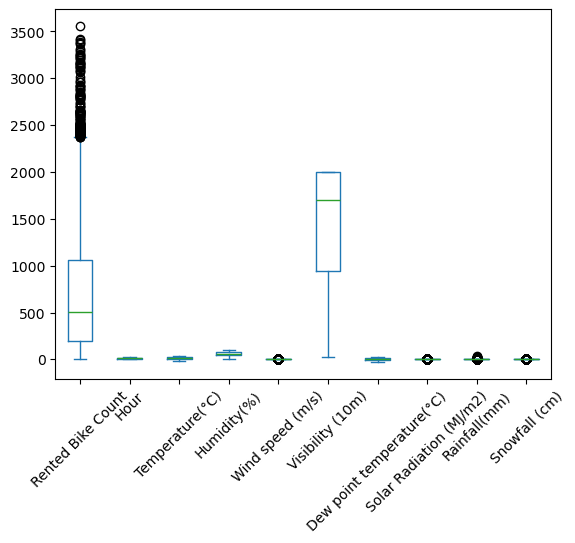

In [21]:
plt.figure(figsize=(10,7))
num_df.plot(kind='box')
plt.xticks(rotation=45)

#### Removing Outliers from Columns - WINDSPEED & SOLAR RADIATION

In [23]:
Q1 = np.percentile(df['Wind speed (m/s)'], 25)
Q3 = np.percentile(df['Wind speed (m/s)'], 75)
IQR = Q3 - Q1

# Calculate lower and upper limits
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

print("Lower Limit:", lower_limit)
print("Upper Limit:", upper_limit)

Lower Limit: -1.1999999999999997
Upper Limit: 4.3999999999999995


In [25]:
df['Wind speed (m/s)'].describe()

count    8760.000000
mean        1.724909
std         1.036300
min         0.000000
25%         0.900000
50%         1.500000
75%         2.300000
max         7.400000
Name: Wind speed (m/s), dtype: float64

In [27]:
df = df[df['Wind speed (m/s)'] <= upper_limit]
df

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [37]:
Q1 = np.percentile(df['Solar Radiation (MJ/m2)'], 25)
Q3 = np.percentile(df['Solar Radiation (MJ/m2)'], 75)
IQR = Q3 - Q1

# Calculate lower and upper limits
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

print("Lower Limit:", lower_limit)
print("Upper Limit:", upper_limit)

Lower Limit: -1.35
Upper Limit: 2.25


In [84]:
df = df[df['Solar Radiation (MJ/m2)'] <= upper_limit]
df

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


### EDA 

#### Univariate Analysis

array([[<Axes: title={'center': 'Rented Bike Count'}>,
        <Axes: title={'center': 'Hour'}>,
        <Axes: title={'center': 'Temperature(°C)'}>],
       [<Axes: title={'center': 'Humidity(%)'}>,
        <Axes: title={'center': 'Wind speed (m/s)'}>,
        <Axes: title={'center': 'Visibility (10m)'}>],
       [<Axes: title={'center': 'Dew point temperature(°C)'}>,
        <Axes: title={'center': 'Solar Radiation (MJ/m2)'}>,
        <Axes: title={'center': 'Rainfall(mm)'}>],
       [<Axes: title={'center': 'Snowfall (cm)'}>, <Axes: >, <Axes: >]],
      dtype=object)

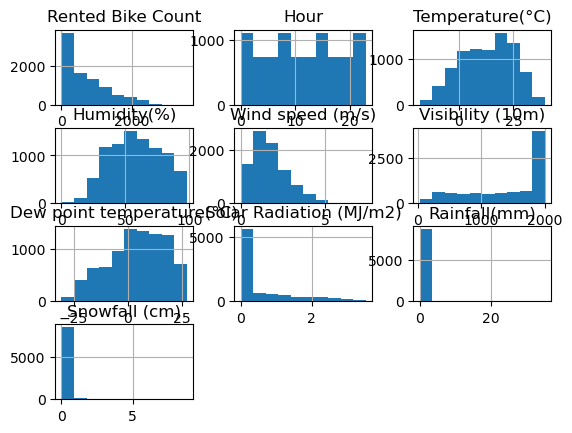

In [47]:
num_df.hist()

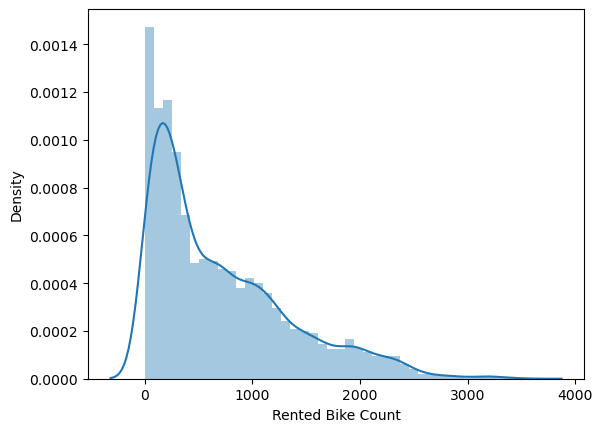

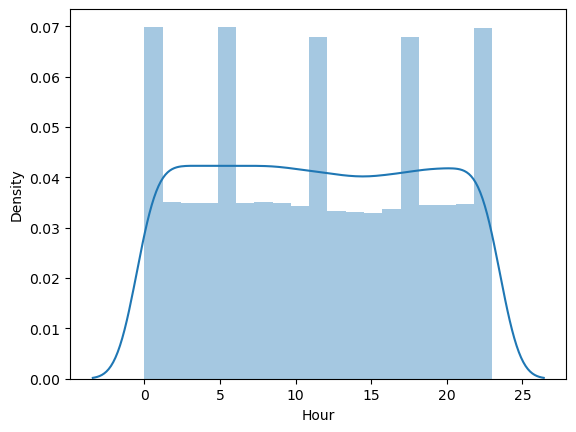

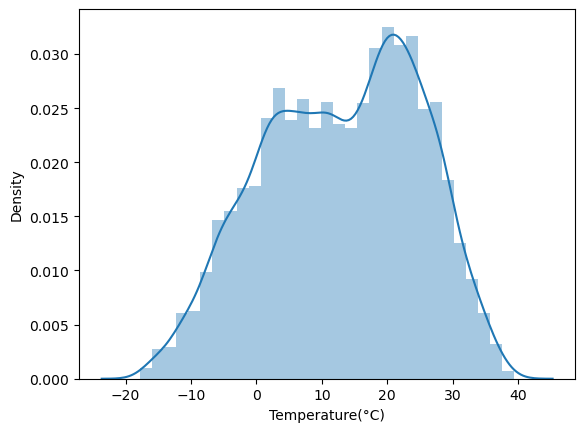

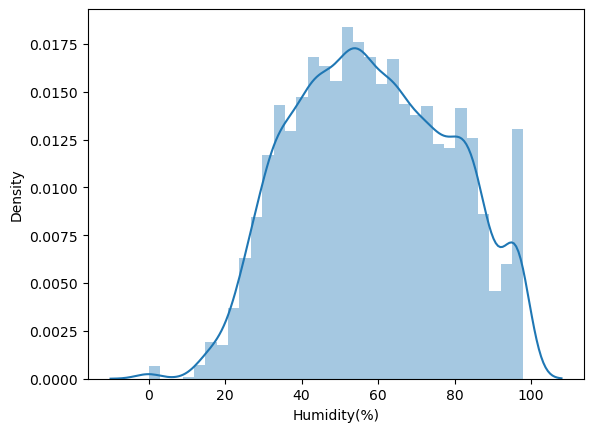

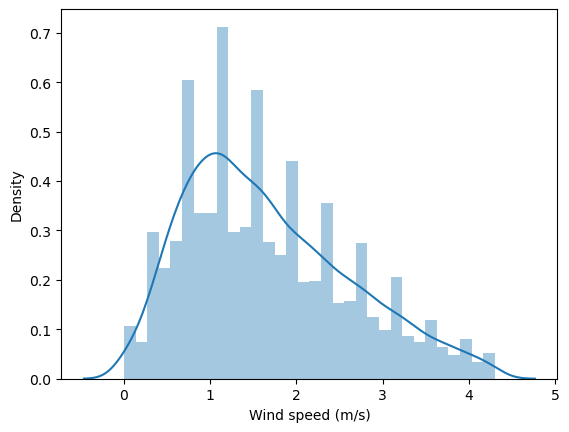

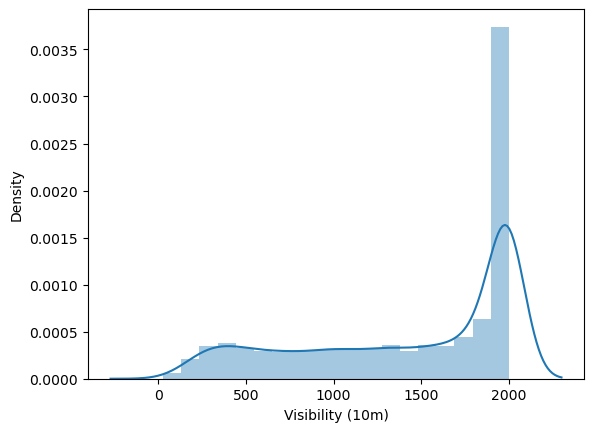

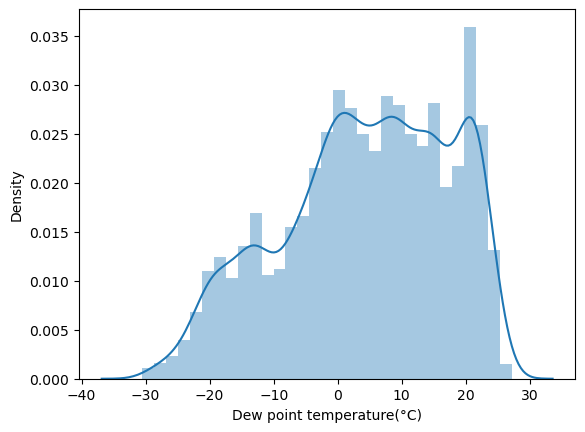

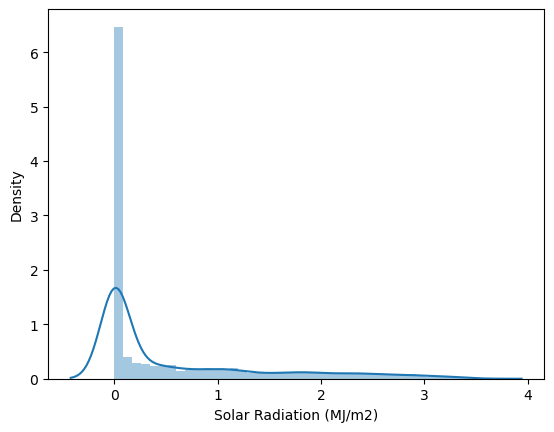

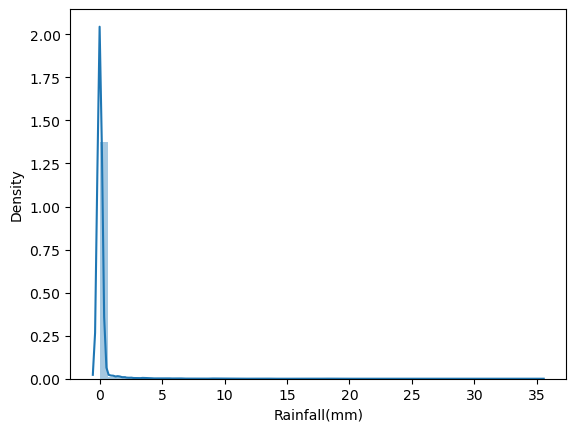

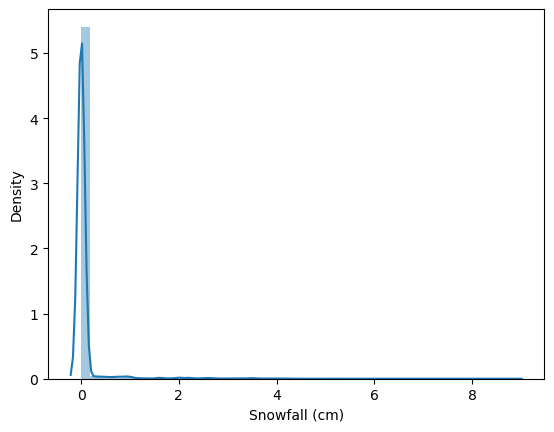

In [49]:
for col in num_df.columns:
    sns.distplot(df[col])
    plt.show()

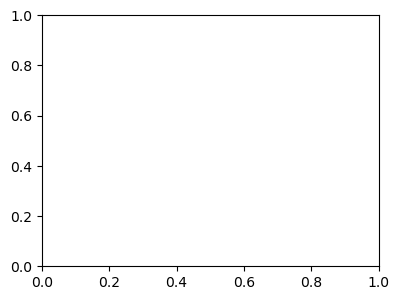

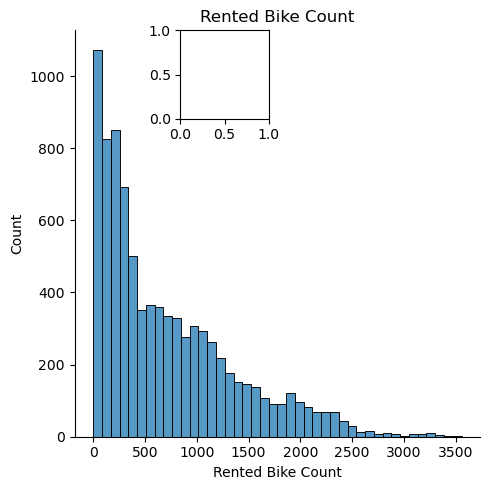

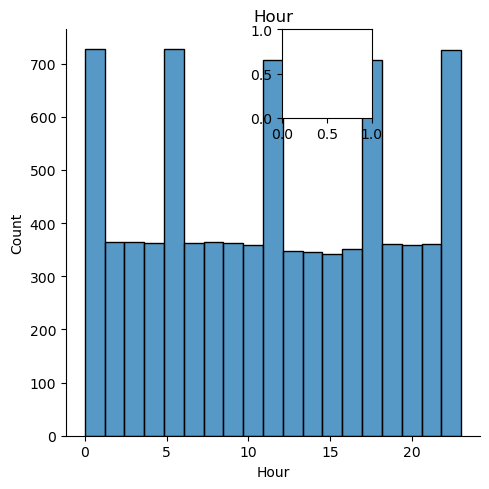

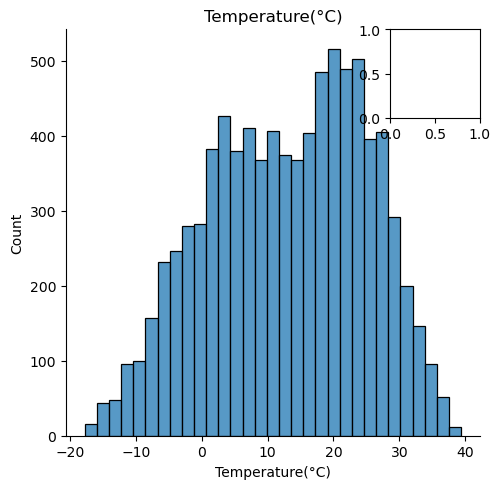

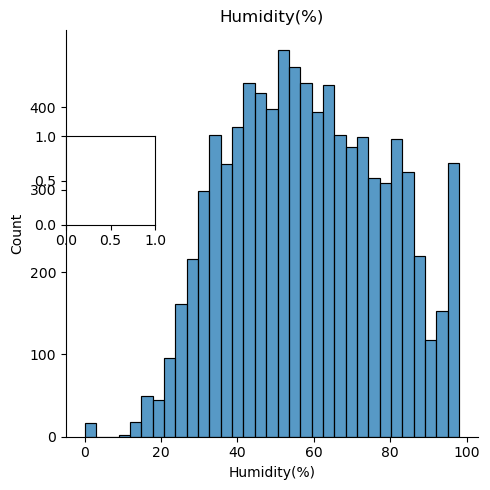

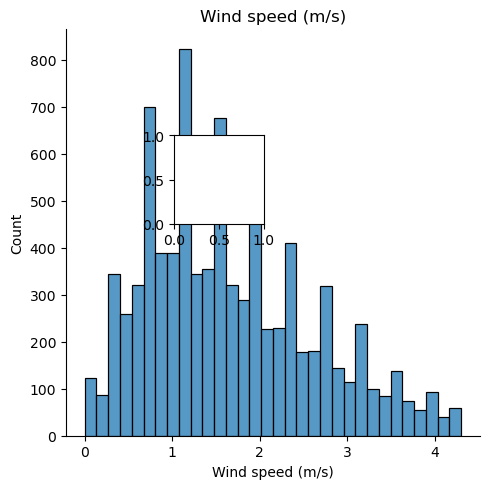

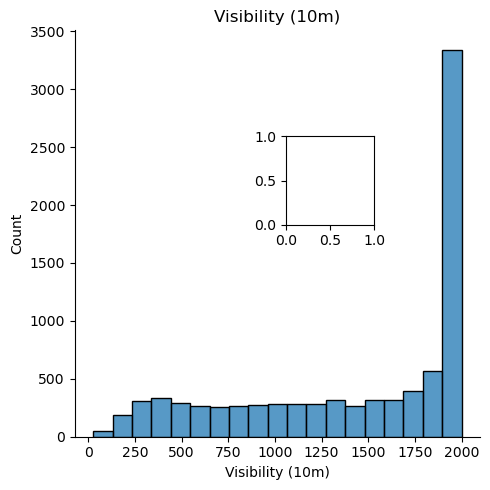

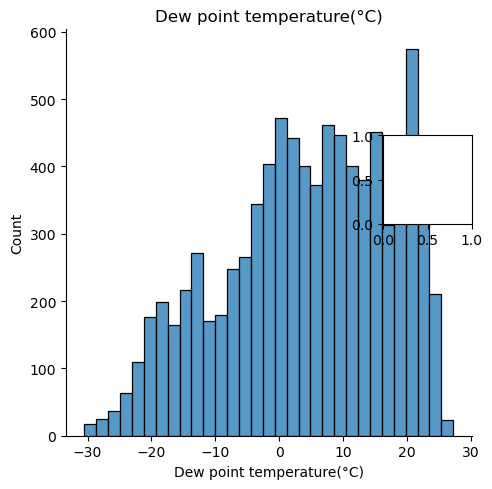

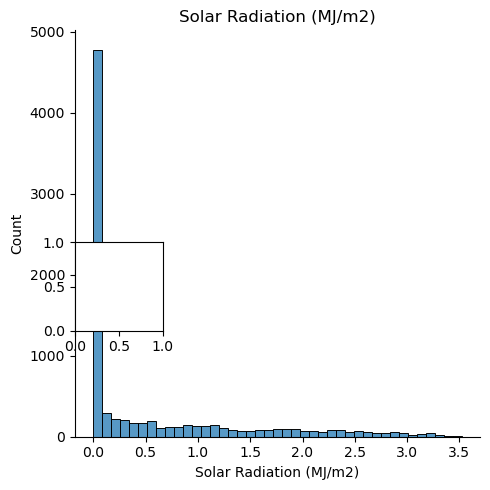

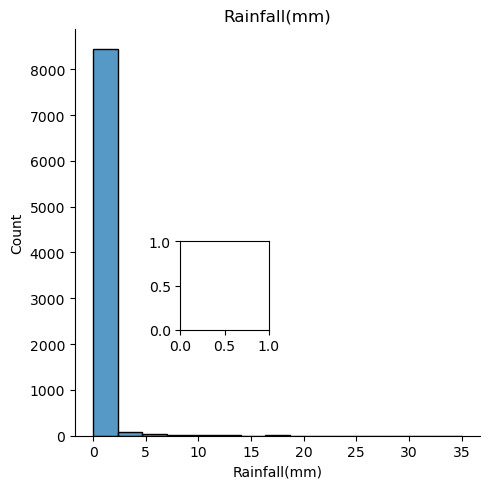

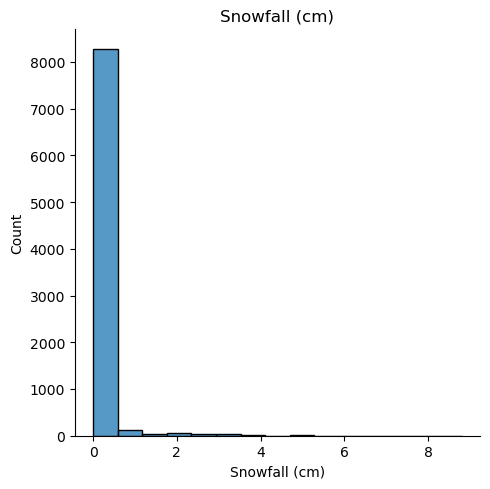

In [51]:
n = 1
plt.figure(figsize = (20,15))
for col in num_df.columns:
    plt.subplot(4,4,n)
    n=n+1
    sns.displot(df[col])
    plt.title(col)
    plt.tight_layout()

In [31]:
df['Seasons'].value_counts()

Seasons
Summer    2198
Autumn    2160
Spring    2150
Winter    2091
Name: count, dtype: int64

In [57]:
df['Hour'] = df['Hour'].astype('object')

In [65]:
df['Date'] = pd.to_datetime(df['Date'],format='mixed')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8599 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8599 non-null   datetime64[ns]
 1   Rented Bike Count          8599 non-null   int64         
 2   Hour                       8599 non-null   object        
 3   Temperature(°C)            8599 non-null   float64       
 4   Humidity(%)                8599 non-null   int64         
 5   Wind speed (m/s)           8599 non-null   float64       
 6   Visibility (10m)           8599 non-null   int64         
 7   Dew point temperature(°C)  8599 non-null   float64       
 8   Solar Radiation (MJ/m2)    8599 non-null   float64       
 9   Rainfall(mm)               8599 non-null   float64       
 10  Snowfall (cm)              8599 non-null   float64       
 11  Seasons                    8599 non-null   object        
 12  Holiday    

In [67]:
import datetime as dt 
df['day_of_week'] = df['Date'].dt.day_name()

In [75]:
df['month'] = df['Date'].dt.month_name()
df['year'] = df['Date'].map(lambda x : x.year).astype('object')
df

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,day_of_week,month,year
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Thursday,January,2017
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Thursday,January,2017
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,Thursday,January,2017
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Thursday,January,2017
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Thursday,January,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-11-30,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,Friday,November,2018
8756,2018-11-30,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,Friday,November,2018
8757,2018-11-30,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,Friday,November,2018
8758,2018-11-30,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes,Friday,November,2018


In [86]:
df.drop('Date',axis=1,inplace=True)

In [59]:
df['Hour'].value_counts()

Hour
8     365
2     365
3     364
1     364
5     364
6     364
0     363
9     363
23    363
7     363
4     363
22    362
21    361
19    360
20    359
10    358
18    357
11    355
12    352
16    351
17    349
13    347
14    345
15    342
Name: count, dtype: int64

In [35]:
df['Holiday'].value_counts()

Holiday
No Holiday    8179
Holiday        420
Name: count, dtype: int64

In [88]:
categorical_df = df.select_dtypes(include='object')
categorical_df

,Hour,Seasons,Holiday,Functioning Day,day_of_week,month,year
0,0,Winter,No Holiday,Yes,Thursday,January,2017
1,1,Winter,No Holiday,Yes,Thursday,January,2017
2,2,Winter,No Holiday,Yes,Thursday,January,2017
3,3,Winter,No Holiday,Yes,Thursday,January,2017
4,4,Winter,No Holiday,Yes,Thursday,January,2017
...,...,...,...,...,...,...,...
8755,19,Autumn,No Holiday,Yes,Friday,November,2018
8756,20,Autumn,No Holiday,Yes,Friday,November,2018
8757,21,Autumn,No Holiday,Yes,Friday,November,2018
8758,22,Autumn,No Holiday,Yes,Friday,November,2018


In [90]:
num_df

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
8755,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0
8756,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0
8757,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0
8758,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0


In [94]:
for col in categorical_df.columns:
    print('\n')
    print('Column Name: ',col)
    print(df[col].value_counts)



Column Name:  Hour
<bound method IndexOpsMixin.value_counts of 0        0
1        1
2        2
3        3
4        4
        ..
8755    19
8756    20
8757    21
8758    22
8759    23
Name: Hour, Length: 8599, dtype: object>


Column Name:  Seasons
<bound method IndexOpsMixin.value_counts of 0       Winter
1       Winter
2       Winter
3       Winter
4       Winter
         ...  
8755    Autumn
8756    Autumn
8757    Autumn
8758    Autumn
8759    Autumn
Name: Seasons, Length: 8599, dtype: object>


Column Name:  Holiday
<bound method IndexOpsMixin.value_counts of 0       No Holiday
1       No Holiday
2       No Holiday
3       No Holiday
4       No Holiday
           ...    
8755    No Holiday
8756    No Holiday
8757    No Holiday
8758    No Holiday
8759    No Holiday
Name: Holiday, Length: 8599, dtype: object>


Column Name:  Functioning Day
<bound method IndexOpsMixin.value_counts of 0       Yes
1       Yes
2       Yes
3       Yes
4       Yes
       ... 
8755    Yes
8756    Yes
875

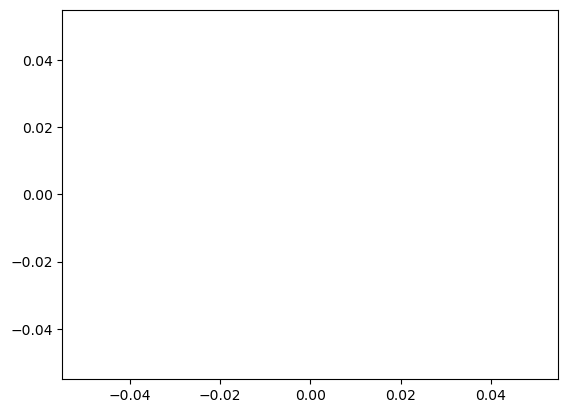

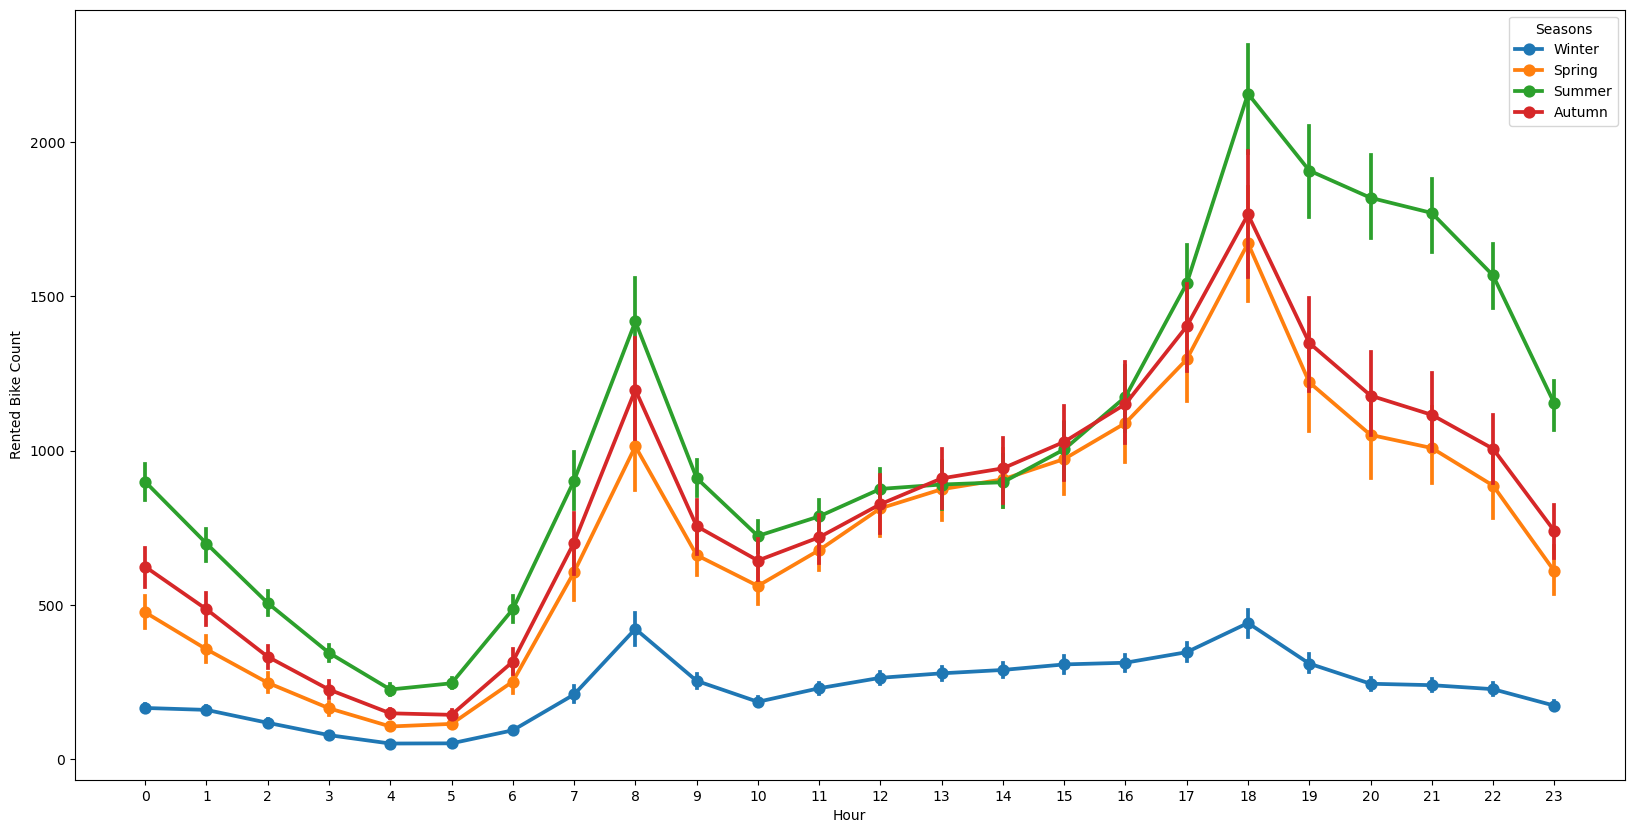

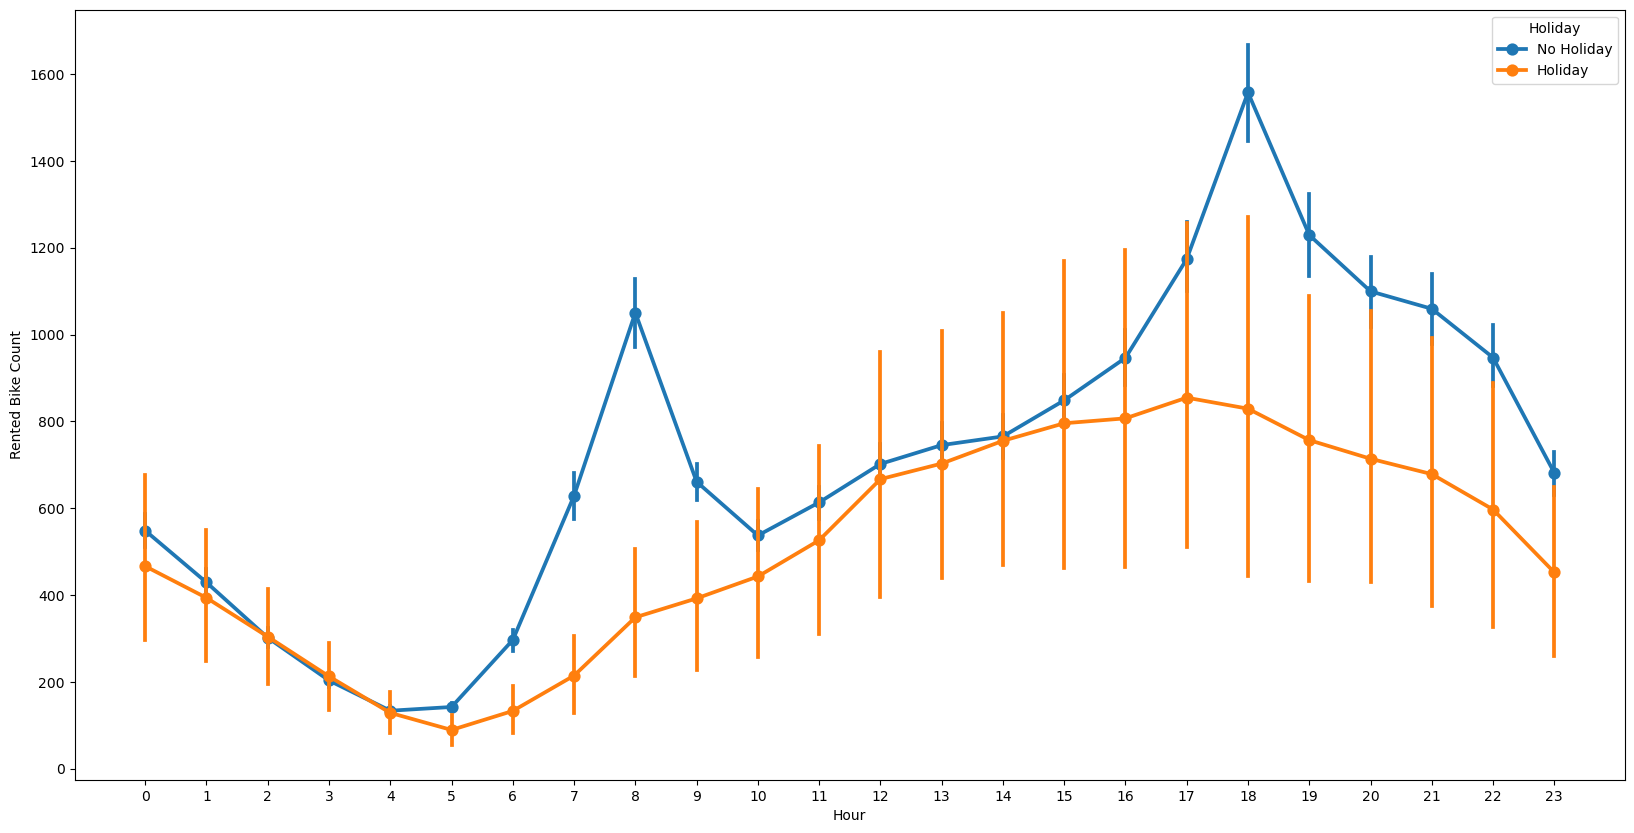

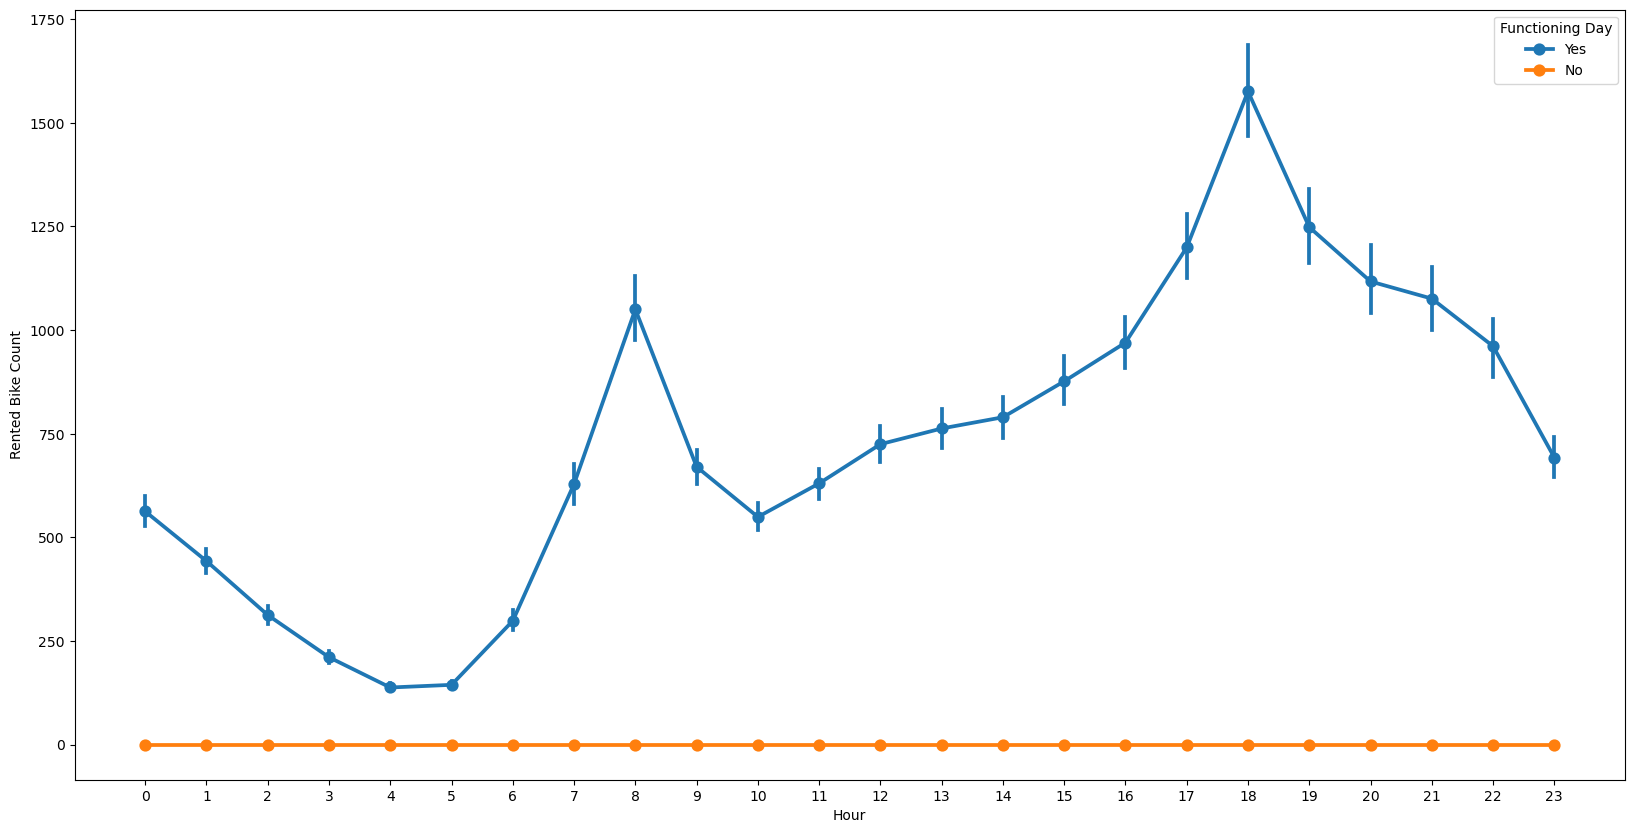

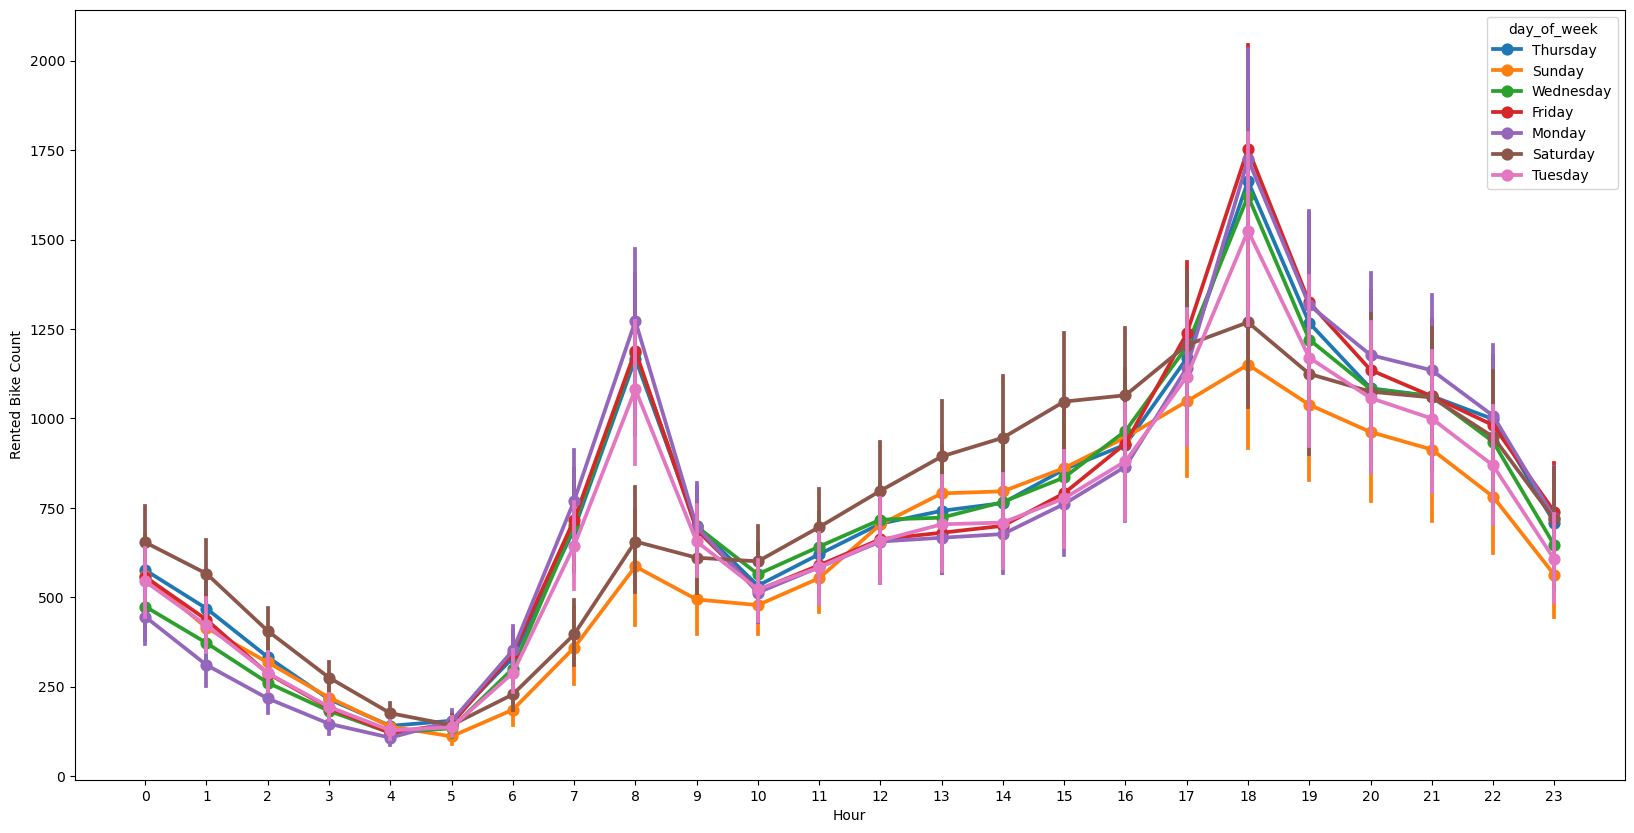

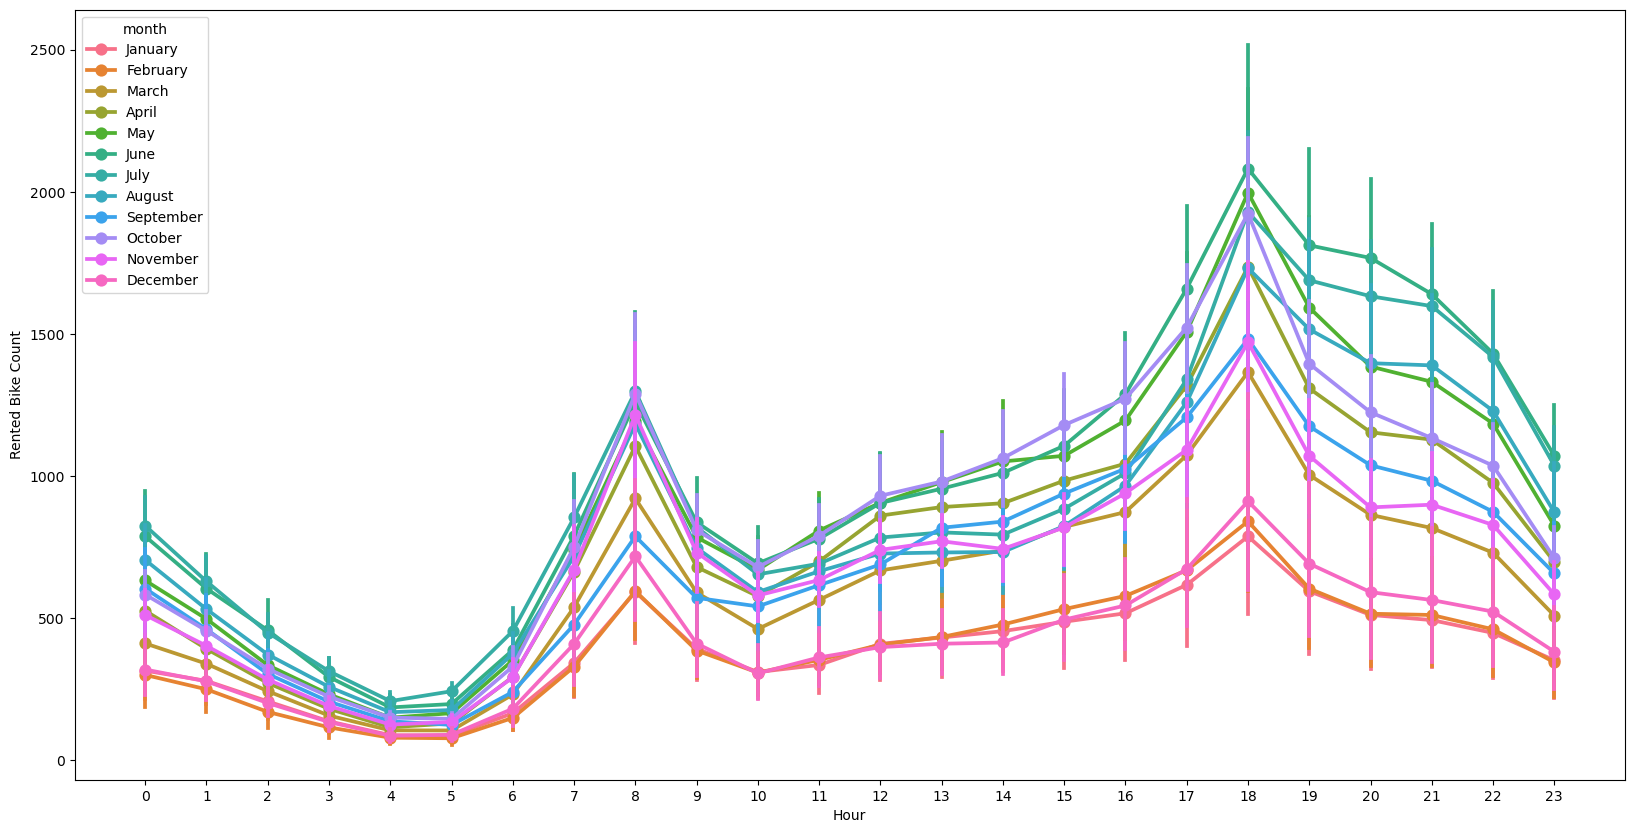

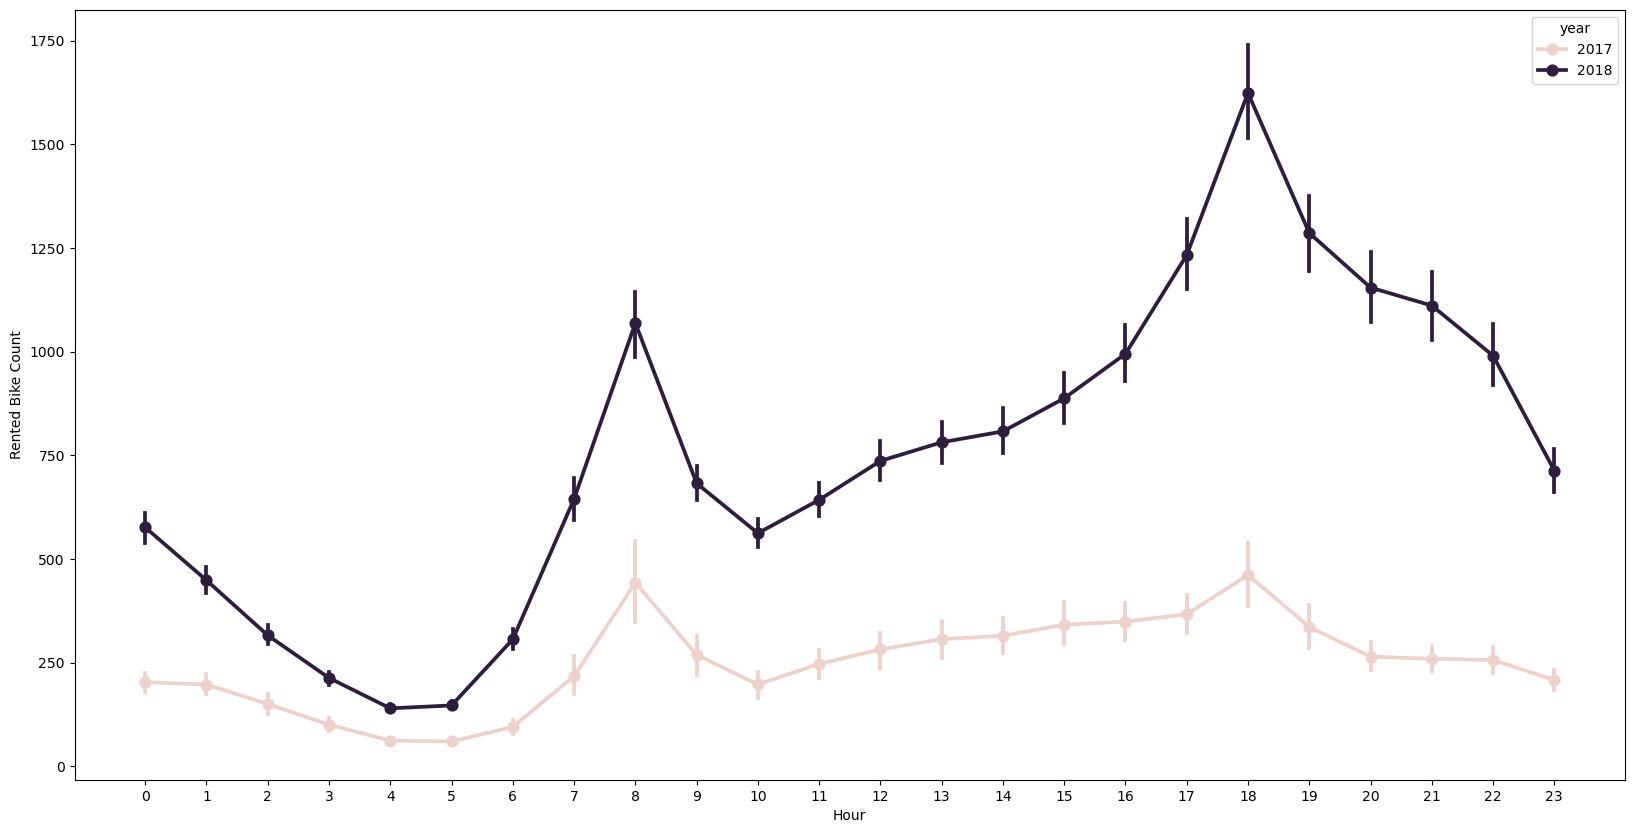

In [100]:
for col in categorical_df.columns:
    if col == 'Hour':
        pass
    else:
        plt.figure(figsize=(20,10))
        sns.pointplot(x=df['Hour'],y=df['Rented Bike Count'],hue=df[col])
    plt.plot()

### 🔗 Correlation Analysis

A heatmap of correlations helps identify relationships between numerical features and the target (`Rented Bike Count`). This is useful for feature selection.

<Axes: >

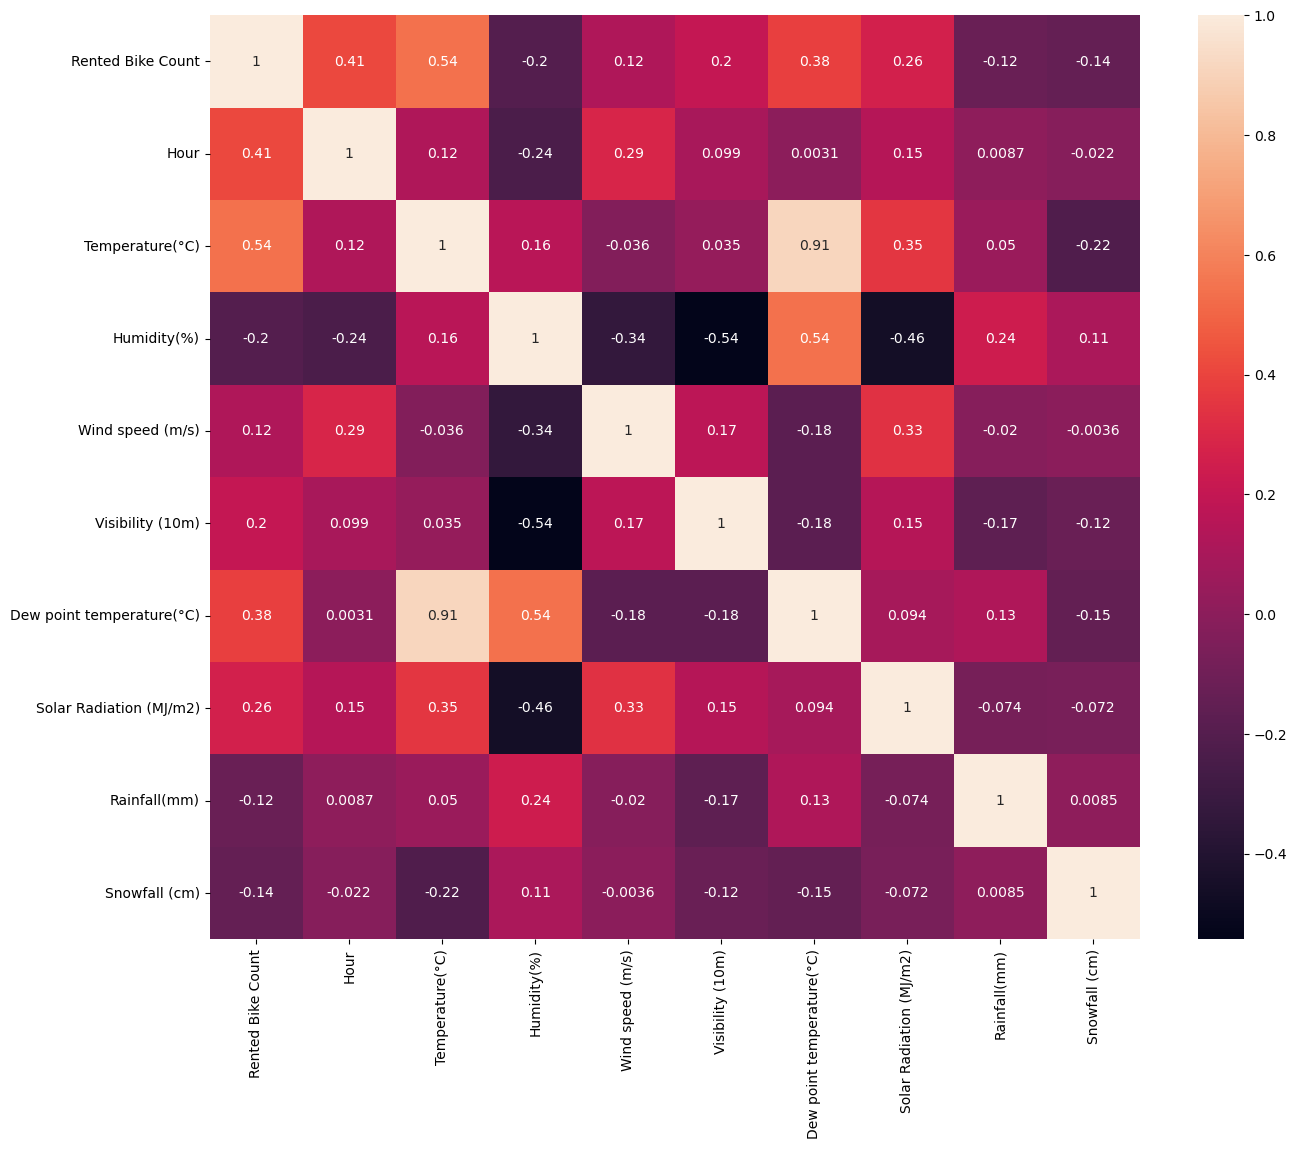

In [104]:
plt.figure(figsize=(15,12))
sns.heatmap(num_df.corr(),annot=True)

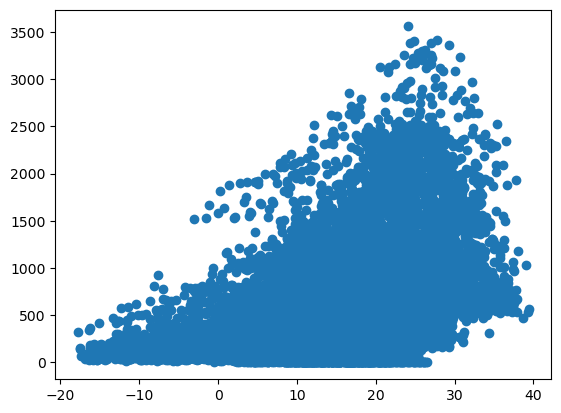

In [106]:
plt.scatter(df['Temperature(°C)'],df['Rented Bike Count'])

### ✅ Conclusion

- Rented bike count is highly influenced by **temperature**, **hour of day**, **functioning day status**, and **humidity**.
- Models like Random Forest and XGBoost provide high accuracy in predicting demand.
- These insights can help city planners optimize bike availability and improve public service efficiency.